In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from joblib import load, dump
import numpy as np
import time
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
# from boruta import BorutaPy 

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

dir = '/content/drive/My Drive/Fashion MNIST/'

In [0]:
train_df = pd.read_csv(dir + 'fashion-mnist_train.csv')
test_df = pd.read_csv(dir + 'fashion-mnist_test.csv')
features_list = train_df.columns.values[1:]

In [4]:
#Get 2 samples from each class
training_class_count = Counter(train_df.iloc[:,0].values)
test_class_count = Counter(test_df.iloc[:,0].values)

print("Training Class count :")
print(training_class_count)
print("Test Class count :")
print(test_class_count)

Training Class count :
Counter({2: 6000, 9: 6000, 6: 6000, 0: 6000, 3: 6000, 4: 6000, 5: 6000, 8: 6000, 7: 6000, 1: 6000})
Test Class count :
Counter({0: 1000, 1: 1000, 2: 1000, 3: 1000, 8: 1000, 6: 1000, 5: 1000, 4: 1000, 7: 1000, 9: 1000})


In [0]:
#Using Bourta algorithm to perform wrapper feature selection
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', n_jobs=-1, random_state=42)

feature_selector = BorutaPy(rf, n_estimators='auto', random_state=42, verbose=1, max_iter=15)
feature_selector.fit(x_train_scaled, y_train)

Iteration: 1 / 15
Iteration: 2 / 15
Iteration: 3 / 15
Iteration: 4 / 15
Iteration: 5 / 15
Iteration: 6 / 15
Iteration: 7 / 15
Iteration: 8 / 15
Iteration: 9 / 15
Iteration: 10 / 15
Iteration: 11 / 15
Iteration: 12 / 15
Iteration: 13 / 15
Iteration: 14 / 15


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	630
Tentative: 	11
Rejected: 	130


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='entropy', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=361, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F353E2B7360,
                                          verbose=0, warm_start=False),
         max_iter=15, n_estimators='auto', perc=100,
         rando

In [0]:
feature_selector =  load('/content/drive/My Drive/Fashion MNIST/feature_selector_new.joblib')

In [0]:
selected_features = [features_list[idx] for idx, i in enumerate(feature_selector.support_) if i == True]
len(selected_features)

630

In [5]:
features = pd.DataFrame(columns=["Boruta Features"])
features["Boruta Features"] = selected_features
features.to_csv('/content/drive/My Drive/Fashion MNIST/boruta_features_new.csv', index=False)

NameError: ignored

In [0]:
features_df = pd.read_csv('/content/drive/My Drive/Fashion MNIST/boruta_features_new.csv')
new_train_df = train_df[["label"] + list(features_df["Boruta Features"])]
new_test_df = test_df[["label"] + list(features_df["Boruta Features"])]

In [0]:
x_train = new_train_df.iloc[:,1:]
y_train = new_train_df.iloc[:,0].values
x_test = new_test_df.iloc[:,1:]
y_test = new_test_df.iloc[:,0].values
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
           "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Z-Score normalization:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train_scaled_full = scaler.fit_transform(train_df.iloc[:,1:].values)
x_test_scaled_full = scaler.fit_transform(test_df.iloc[:,1:].values)

In [0]:
#Create  sample for the demo
demo_test_df = pd.DataFrame(columns=new_test_df.columns.values)

for idx, each_class in enumerate(classes):
  #Pick the first two samples from each class

  test_indices = test_df.index[test_df['label'] == idx][:10]
  x_sample = x_test_scaled[test_indices]
  y_sample = y_test[test_indices]

  temp_df = pd.DataFrame(np.column_stack([y_sample, x_sample]),
                         columns= demo_test_df.columns.values)
  demo_test_df = pd.concat([demo_test_df, temp_df], axis=0)


In [0]:
demo_test_df['label'] = demo_test_df['label'].astype(int)
demo_test_df = demo_test_df.sample(frac=1, random_state=42)
demo_test_df.to_csv('/content/drive/My Drive/Fashion MNIST/demo.csv', index=False)

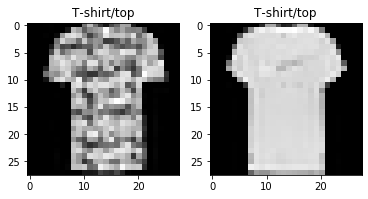

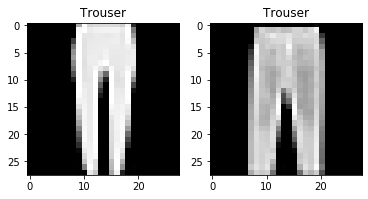

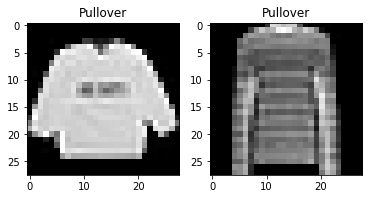

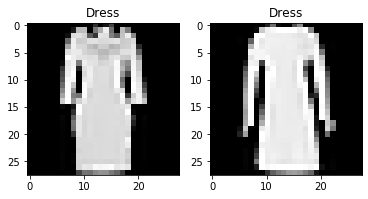

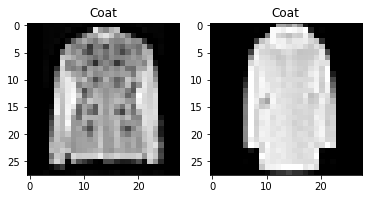

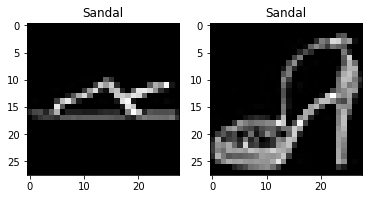

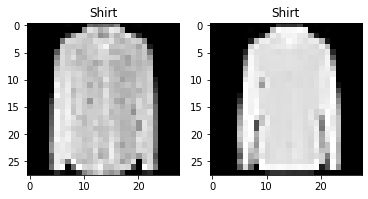

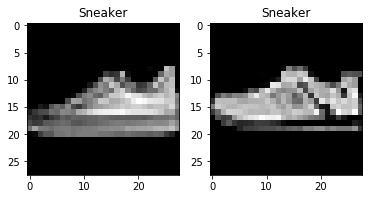

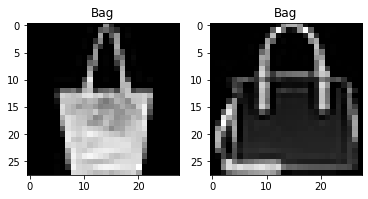

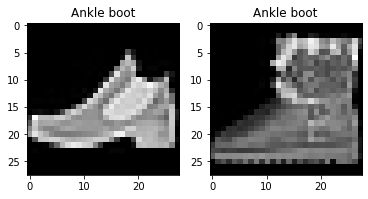

In [0]:
#Displaying the differences in samples of a class

for idx, each_class in enumerate(classes):
  #Pick the first two samples from each class
  temp_train_df = train_df.loc[train_df['label'] == idx][:2]

  figure,ax = plt.subplots(1, 2)
  
  sample_1 = temp_train_df.iloc[0]
  image_1 = np.array(sample_1[1:]).reshape((28,28))
  ax[0].set_title(classes[idx])
  ax[0].imshow(image_1, cmap="gray")
  

  sample_2 = temp_train_df.iloc[1]
  image_2 = np.array(sample_2[1:]).reshape((28,28))
  ax[1].set_title(classes[idx])
  ax[1].imshow(image_2, cmap="gray")


In [0]:
#Building a correlation matrix based on the filtered features
correlation_df = new_train_df.corr()

for column in train_df.columns.values:
  target = correlation_df[column]
  most_cor_features = target[target > 0.0]

  if 

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f7c5bbfb400> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
target = abs(correlation_df['label'])
most_cor_features = target[target > 0.5]

In [0]:
# list(most_cor_features.keys())

['label',
 'pixel11',
 'pixel12',
 'pixel17',
 'pixel18',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel94',
 'pixel95',
 'pixel96',
 'pixel97',
 'pixel98',
 'pixel99',
 'pixel100',
 'pixel101',
 'pixel102',
 'pixel103',
 'pixel122',
 'pixel123',
 'pixel124',
 'pixel125',
 'pixel126',
 'pixel127',
 'pixel128',
 'pixel150',
 'pixel151',
 'pixel152',
 'pixel153',
 'pixel154',
 'pixel155',
 'pixel178',
 'pixel179',
 'pixel180',
 'pixel181',
 'pixel182',
 'pixel207',
 'pixel208',
 'pixel209',
 'pixel210',
 'pixel235',
 'pixel236',
 'pixel237',
 'pixel264',
 'pixel265',
 'pixel306',
 'pixel333',
 'pixel334',
 'pixel360',
 'pixel361',
 'pixel362',
 'pixel363',
 'pixel387',
 'pixel388',
 'pixel389',
 'pixel390',
 'pixel391',
 'pixel414',
 'pixel415',
 'pixel416',
 'pixel417',
 'pixel418',
 'pixel419',
 'pix

In [0]:
#PCA experiments
x_train_pca = PCA(n_components=0.95, random_state=42).fit(x_train_scaled_full)
# x_test_pca = PCA(n_components=0.95, random_state=42).fit(x_test_scaled_full)

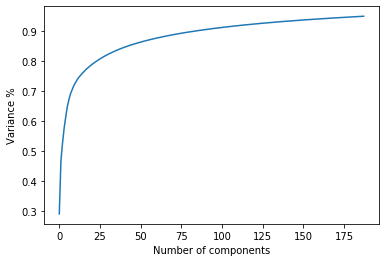

In [0]:
plt.figure()
values = np.cumsum(x_train_pca.explained_variance_ratio_)
plt.plot(values)
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.show()

In [0]:
#Results were very poor and hence the implementation is remove
#Kept the diagram and PCA code for future work
x_train_pca = PCA(n_components=188, random_state=42).fit_transform(x_train_scaled)
x_test_pca = PCA(n_components=188, random_state=42).fit_transform(x_test_scaled)

In [0]:
# x_pca_test = PCA(n_components=2, random_state=42).fit_transform(x_test_scaled)

clf = RandomForestClassifier(criterion="entropy", n_estimators=100, random_state=42, n_jobs=-1)
# clf = LogisticRegression(solver="sag", n_jobs=-1, multi_class='multinomial',
#                          max_iter=500, random_state=42)
# clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# clf = GaussianNB()
# clf = BaggingClassifier(SVC(kernel='rbf', C=10, max_iter=2000),
#                         n_estimators=3, max_samples=20000, bootstrap=False,
#                         random_state=42, n_jobs=-1, verbose=10)

start = time.time()
clf.fit(x_train_pca,y_train)
end = time.time() - start

y_pred = clf.predict(x_test_pca)
acc = accuracy_score(y_pred, y_test)

print("Training time : {}, Accu : {}".format(end, acc))

Training time : 286.5616114139557, Accu : 0.6139


Mutual Information for feaure selection

In [0]:
mi = mutual_info_classif(x_train_scaled_full, y_train, n_neighbors=3, random_state=42)

In [0]:
selected_features = [features_list[idx] for idx, i in enumerate(mi) if i > 0.000]
len(selected_features)

783

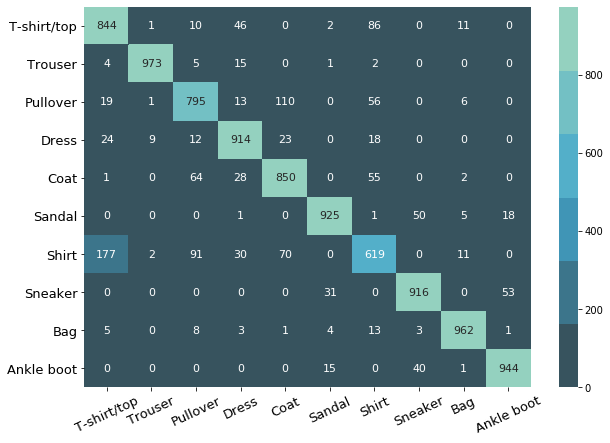

In [0]:
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = classes,
                         columns = classes)

plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"fontsize":11},
                 cmap=sns.color_palette("GnBu_d"))
ax.set_ylim(10.0, 0.0)
ax.set_yticklabels(labels=classes, fontsize=13)
ax.set_xticklabels(labels=classes, fontsize=13, rotation=25)

plt.show()

In [0]:
# collections.Counter(y_train)
idx = 6
image = x_train[idx].reshape((28,28))
plt.title(classes[y_train[idx]])
plt.imshow(image, cmap="gray")
plt.show()

# y_train[:10]